# Part 1: Text Processing and Exploratory Data Analysis

## 1. Data preparation

In [111]:
%pip install nltk

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [112]:
import os, string
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from unidecode import unidecode
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pdpau\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pdpau\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\pdpau\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [113]:
data_path =  os.path.join(os.getcwd(), '../../data/')
doc_path = os.path.join(data_path, 'fashion_products_dataset.json')

data = pd.read_json(doc_path)

data.head(5)

,_id,actual_price,average_rating,brand,category,crawled_at,description,discount,images,out_of_stock,pid,product_details,seller,selling_price,sub_category,title,url
0,fa8e22d6-c0b6-5229-bb9e-ad52eda39a0a,"2,999",3.9,York,Clothing and Accessories,2021-02-10 20:11:51,Yorker trackpants made from 100% rich combed c...,69% off,[https://rukminim1.flixcart.com/image/128/128/...,False,TKPFCZ9EA7H5FYZH,"[{'Style Code': '1005COMBO2'}, {'Closure': 'El...",Shyam Enterprises,921,Bottomwear,Solid Women Multicolor Track Pants,https://www.flipkart.com/yorker-solid-men-mult...
1,893e6980-f2a0-531f-b056-34dd63fe912c,"1,499",3.9,York,Clothing and Accessories,2021-02-10 20:11:52,Yorker trackpants made from 100% rich combed c...,66% off,[https://rukminim1.flixcart.com/image/128/128/...,False,TKPFCZ9EJZV2UVRZ,"[{'Style Code': '1005BLUE'}, {'Closure': 'Draw...",Shyam Enterprises,499,Bottomwear,Solid Men Blue Track Pants,https://www.flipkart.com/yorker-solid-men-blue...
2,eb4c8eab-8206-59d0-bcd1-a724d96bf74f,"2,999",3.9,York,Clothing and Accessories,2021-02-10 20:11:52,Yorker trackpants made from 100% rich combed c...,68% off,[https://rukminim1.flixcart.com/image/128/128/...,False,TKPFCZ9EHFCY5Z4Y,"[{'Style Code': '1005COMBO4'}, {'Closure': 'El...",Shyam Enterprises,931,Bottomwear,Solid Men Multicolor Track Pants,https://www.flipkart.com/yorker-solid-men-mult...
3,3f3f97bb-5faf-57df-a9ff-1af24e2b1045,"2,999",3.9,York,Clothing and Accessories,2021-02-10 20:11:53,Yorker trackpants made from 100% rich combed c...,69% off,[https://rukminim1.flixcart.com/image/128/128/...,False,TKPFCZ9ESZZ7YWEF,"[{'Style Code': '1005COMBO3'}, {'Closure': 'El...",Shyam Enterprises,911,Bottomwear,Solid Women Multicolor Track Pants,https://www.flipkart.com/yorker-solid-men-mult...
4,750caa3d-6264-53ca-8ce1-94118a1d8951,"2,999",3.9,York,Clothing and Accessories,2021-02-10 20:11:53,Yorker trackpants made from 100% rich combed c...,68% off,[https://rukminim1.flixcart.com/image/128/128/...,False,TKPFCZ9EVXKBSUD7,"[{'Style Code': '1005COMBO1'}, {'Closure': 'Dr...",Shyam Enterprises,943,Bottomwear,"Solid Women Brown, Grey Track Pants",https://www.flipkart.com/yorker-solid-men-brow...


1. As a first step, you must pre-process the documents. In particular, for the text fields (title,
description) you should:

- Removing stop words
- Tokenization
- Removing punctuation marks
- Stemming
- and... anything else you think it's needed (bonus point)

In [114]:
stemmer = PorterStemmer()
stop_words = set(stopwords.words("english"))
translator = str.maketrans('', '', string.punctuation)

stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower() # Lowercase
    text = text.translate(translator) # Remove punctuation
    text = unidecode(text) # normalize
    tokens = word_tokenize(text) # Tokenization
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words] # Remove stopwords and non-alphabetic tokens
    stemmed_tokens = [stemmer.stem(word) for word in tokens] # Stemming 
    stemmed_tokens = [word for word in stemmed_tokens if len(word) > 2] # Remove short tokens
    return ' '.join(stemmed_tokens)

data['title_clean'] = data['title'].apply(preprocess_text)
data['description_clean'] = data['description'].apply(preprocess_text)

data[['pid', 'title', 'title_clean', 'description_clean']].head(5)

# Replace original columns with cleaned versions
data['title'] = data['title_clean']
data['description'] = data['description_clean']
data.drop(columns=['title_clean', 'description_clean'], inplace=True)

2. Take into account that for future queries, the final output must return (when present) the following information for each of the  elected documents: pid, title, description, brand, category, sub_category, product_details, seller, out_of_stock, selling_price, discount, actual_price, average_rating, url

In [115]:
relevant_columns = [
    'pid', 'title', 'description', 'brand', 
    'category', 'sub_category', 'product_details', 
    'seller', 'out_of_stock', 'selling_price', 
    'discount', 'actual_price', 'average_rating', 'url'
]

available_fields = [f for f in relevant_columns if f in data.columns]
clean_data = data[available_fields].copy()
clean_data.head(5)

,pid,title,description,brand,category,sub_category,product_details,seller,out_of_stock,selling_price,discount,actual_price,average_rating,url
0,TKPFCZ9EA7H5FYZH,solid women multicolor track pant,yorker trackpant made rich comb cotton give ri...,York,Clothing and Accessories,Bottomwear,"[{'Style Code': '1005COMBO2'}, {'Closure': 'El...",Shyam Enterprises,False,921,69% off,"2,999",3.9,https://www.flipkart.com/yorker-solid-men-mult...
1,TKPFCZ9EJZV2UVRZ,solid men blue track pant,yorker trackpant made rich comb cotton give ri...,York,Clothing and Accessories,Bottomwear,"[{'Style Code': '1005BLUE'}, {'Closure': 'Draw...",Shyam Enterprises,False,499,66% off,"1,499",3.9,https://www.flipkart.com/yorker-solid-men-blue...
2,TKPFCZ9EHFCY5Z4Y,solid men multicolor track pant,yorker trackpant made rich comb cotton give ri...,York,Clothing and Accessories,Bottomwear,"[{'Style Code': '1005COMBO4'}, {'Closure': 'El...",Shyam Enterprises,False,931,68% off,"2,999",3.9,https://www.flipkart.com/yorker-solid-men-mult...
3,TKPFCZ9ESZZ7YWEF,solid women multicolor track pant,yorker trackpant made rich comb cotton give ri...,York,Clothing and Accessories,Bottomwear,"[{'Style Code': '1005COMBO3'}, {'Closure': 'El...",Shyam Enterprises,False,911,69% off,"2,999",3.9,https://www.flipkart.com/yorker-solid-men-mult...
4,TKPFCZ9EVXKBSUD7,solid women brown grey track pant,yorker trackpant made rich comb cotton give ri...,York,Clothing and Accessories,Bottomwear,"[{'Style Code': '1005COMBO1'}, {'Closure': 'Dr...",Shyam Enterprises,False,943,68% off,"2,999",3.9,https://www.flipkart.com/yorker-solid-men-brow...


3. Decide how to handle the fields category, sub_category, brand, product_details, and seller during pre-processing. Should they be merged into a single text field, indexed as separate fields in the inverted index or any other alternative? Justify your choice, considering how their distinctiveness may affect retrieval effectiveness. What are pros and cons of each approach?

In [116]:
def clean_metadata_field(text):
    if not isinstance(text, str):
        return ""
    text = text.lower().translate(str.maketrans('', '', string.punctuation))
    return text.strip()

metadata_fields = ['category', 'sub_category', 'brand', 'product_details', 'seller']
for field in metadata_fields:
    clean_data[f'{field}_clean'] = clean_data[field].apply(clean_metadata_field)

display(clean_data.head(5))

# Replace original metadata columns with cleaned versions
for field in metadata_fields:
    clean_data[field] = clean_data[f'{field}_clean']
    clean_data.drop(columns=[f'{field}_clean'], inplace=True)

,pid,title,description,brand,category,sub_category,product_details,seller,out_of_stock,selling_price,discount,actual_price,average_rating,url,category_clean,sub_category_clean,brand_clean,product_details_clean,seller_clean
0,TKPFCZ9EA7H5FYZH,solid women multicolor track pant,yorker trackpant made rich comb cotton give ri...,York,Clothing and Accessories,Bottomwear,"[{'Style Code': '1005COMBO2'}, {'Closure': 'El...",Shyam Enterprises,False,921,69% off,"2,999",3.9,https://www.flipkart.com/yorker-solid-men-mult...,clothing and accessories,bottomwear,york,,shyam enterprises
1,TKPFCZ9EJZV2UVRZ,solid men blue track pant,yorker trackpant made rich comb cotton give ri...,York,Clothing and Accessories,Bottomwear,"[{'Style Code': '1005BLUE'}, {'Closure': 'Draw...",Shyam Enterprises,False,499,66% off,"1,499",3.9,https://www.flipkart.com/yorker-solid-men-blue...,clothing and accessories,bottomwear,york,,shyam enterprises
2,TKPFCZ9EHFCY5Z4Y,solid men multicolor track pant,yorker trackpant made rich comb cotton give ri...,York,Clothing and Accessories,Bottomwear,"[{'Style Code': '1005COMBO4'}, {'Closure': 'El...",Shyam Enterprises,False,931,68% off,"2,999",3.9,https://www.flipkart.com/yorker-solid-men-mult...,clothing and accessories,bottomwear,york,,shyam enterprises
3,TKPFCZ9ESZZ7YWEF,solid women multicolor track pant,yorker trackpant made rich comb cotton give ri...,York,Clothing and Accessories,Bottomwear,"[{'Style Code': '1005COMBO3'}, {'Closure': 'El...",Shyam Enterprises,False,911,69% off,"2,999",3.9,https://www.flipkart.com/yorker-solid-men-mult...,clothing and accessories,bottomwear,york,,shyam enterprises
4,TKPFCZ9EVXKBSUD7,solid women brown grey track pant,yorker trackpant made rich comb cotton give ri...,York,Clothing and Accessories,Bottomwear,"[{'Style Code': '1005COMBO1'}, {'Closure': 'Dr...",Shyam Enterprises,False,943,68% off,"2,999",3.9,https://www.flipkart.com/yorker-solid-men-brow...,clothing and accessories,bottomwear,york,,shyam enterprises


4. Consider the fields out_of_stock, selling_price, discount, actual_price, and average_rating. Decide how these should be handled during pre-processing to use in further search. Should they be indexed as textual terms?

In [117]:
# Convert blank cells to NaN
""" def blank_to_nan(x):
    if isinstance(x, str) and x.strip() == "":
        return np.nan
    return x

clean_data = clean_data.applymap(blank_to_nan) """

' def blank_to_nan(x):\n    if isinstance(x, str) and x.strip() == "":\n        return np.nan\n    return x\n\nclean_data = clean_data.applymap(blank_to_nan) '

In [118]:
# Convert data types to numeric
clean_data["out_of_stock"] = clean_data["out_of_stock"].astype(int)

clean_data["selling_price"] = clean_data["selling_price"].str.replace(',', '', regex=False)
clean_data["selling_price"] = clean_data["selling_price"].replace('', np.nan)
clean_data["selling_price"] = clean_data["selling_price"].astype(float)

clean_data["discount"] = clean_data["discount"].str.replace('%', '', regex=False)
clean_data["discount"] = clean_data["discount"].str.replace('off', '', regex=False)
clean_data["discount"] = clean_data["discount"].str.replace(' ', '', regex=False)
clean_data["discount"] = clean_data["discount"].replace('', np.nan)
clean_data["discount"] = clean_data["discount"].astype(float)

clean_data["actual_price"] = clean_data["actual_price"].str.replace(',', '', regex=False)
clean_data["actual_price"] = clean_data["actual_price"].replace('', np.nan)
clean_data["actual_price"] = clean_data["actual_price"].astype(float)

clean_data["average_rating"] = clean_data["average_rating"].replace('', np.nan)
clean_data["average_rating"] = clean_data["average_rating"].astype(float)


clean_data.head(5)

num_fields = ['out_of_stock', 'discount', 'selling_price', 'actual_price', 'average_rating']
display(clean_data[num_fields].describe())

,out_of_stock,discount,selling_price,actual_price,average_rating
count,28080.000000,27225.000000,28078.000000,27303.000000,25819.000000
mean,0.058547,50.256896,705.635088,1455.528110,3.627724
std,0.234779,16.887287,549.681489,939.977456,0.663429
min,0.000000,1.000000,99.000000,150.000000,1.000000
25%,0.000000,40.000000,390.000000,849.000000,3.200000
50%,0.000000,53.000000,545.000000,1199.000000,3.800000
75%,0.000000,63.000000,820.000000,1799.000000,4.100000
max,1.000000,87.000000,7999.000000,12999.000000,5.000000


## 2. Exploratory Data Analysis

When working with data, it is important to have a better understanding of the content and some statistics. Provide an exploratory data analysis to describe the dataset you are working on in this project and explain the decisions made for the analysis. For example, word counting distribution, average sentence length, vocabulary size, ranking of products based on rating, price, discount, top sellers and brands, out_of_stock distribution, word clouds for the most frequent words, and entity recognition. Feel free to do the exploratory analysis and report your findings in the report.

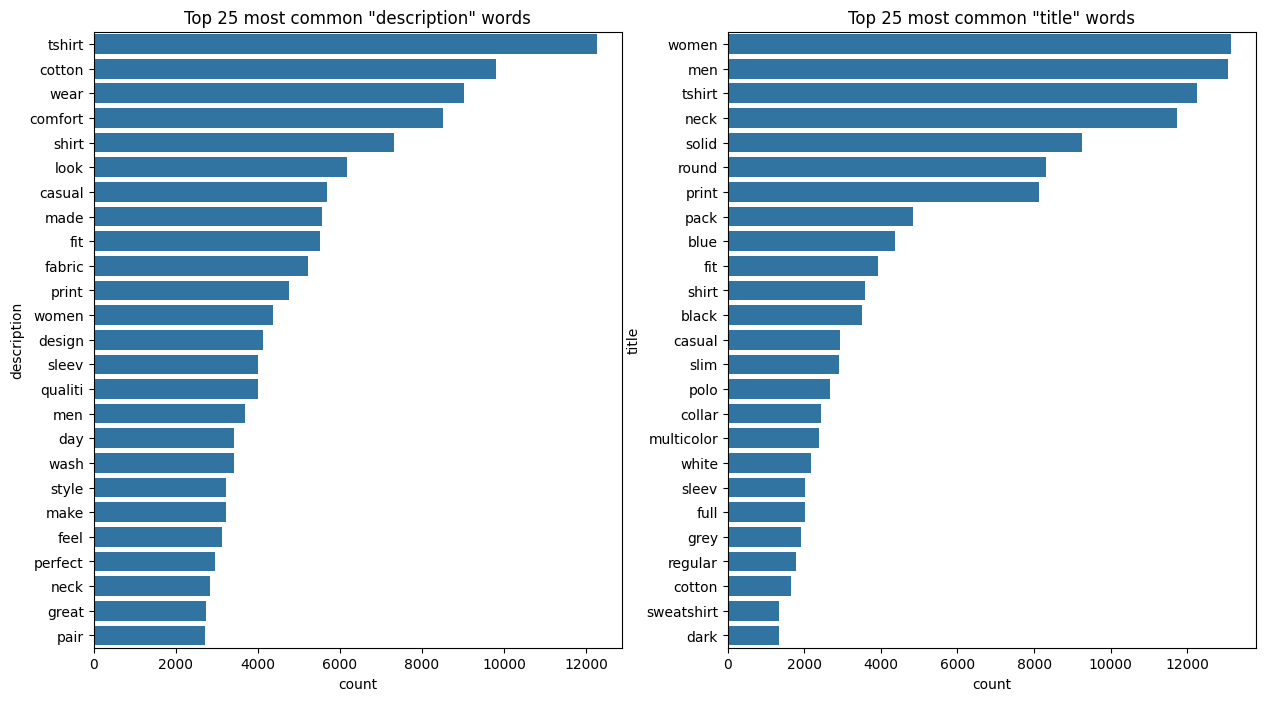

In [119]:
r = 25

plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
tmp = pd.DataFrame(clean_data['description'].str.split().explode().value_counts().sort_values(ascending=False)).reset_index()
sns.barplot(data=tmp[:r], y='description', x='count')
plt.title('Top 25 most common "description" words')

plt.subplot(1, 2, 2)
tmp = pd.DataFrame(clean_data['title'].str.split().explode().value_counts().sort_values(ascending=False)).reset_index()
sns.barplot(data=tmp[:r], y='title', x='count')
plt.title('Top 25 most common "title" words')

plt.show()

In [120]:
print(f'Average sentence length: {clean_data['description'].apply(lambda x: len(x.split())).mean():.2f} words')

Average sentence length: 17.93 words


In [121]:
print(f'Vocabulary size is {clean_data['description'].str.split().explode().nunique()} words') # only from description field

Vocabulary size is 5446 words


In [122]:
# Missing values per column
missing = clean_data.isna().sum().sort_values(ascending=False)
display(missing.to_frame("missing"))


,missing
average_rating,2261
discount,855
actual_price,777
selling_price,2
pid,0
title,0
description,0
brand,0
category,0
sub_category,0


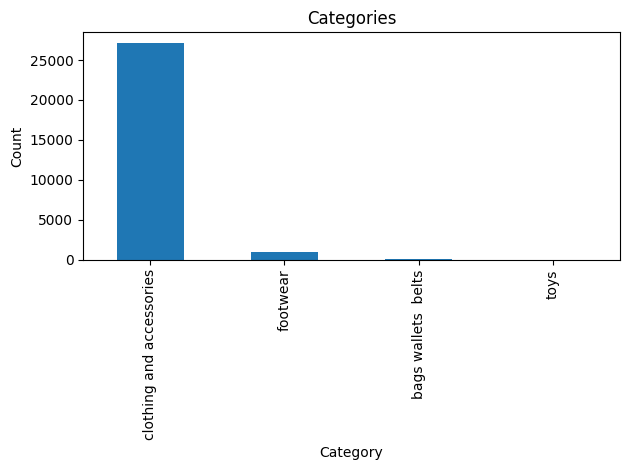

In [123]:
# Different categories
cats = clean_data["category"].value_counts()
plt.figure()
cats.plot(kind="bar")
plt.title("Categories")
plt.xlabel("Category")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

#### Numeric columns

In [124]:
# Out of stock ratio
ratio = (clean_data["out_of_stock"] == 1).mean()
print(f'Out of stock ratio: {ratio:.2%}')

Out of stock ratio: 5.85%


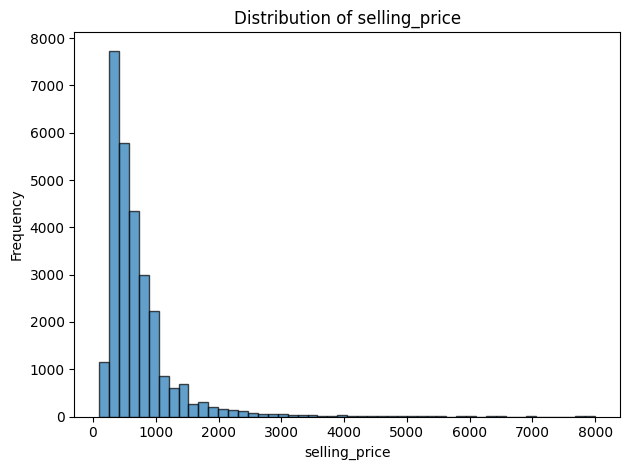

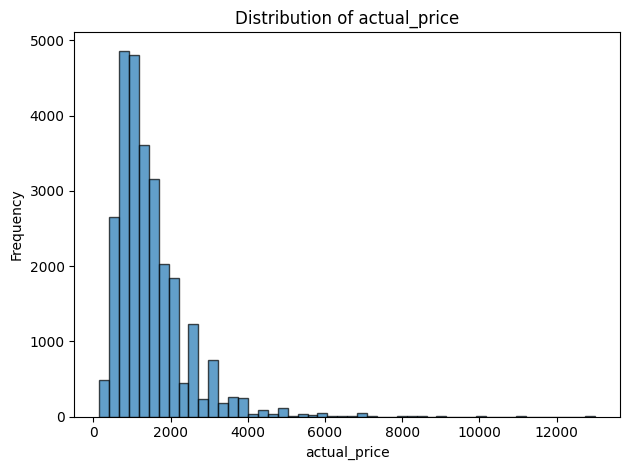

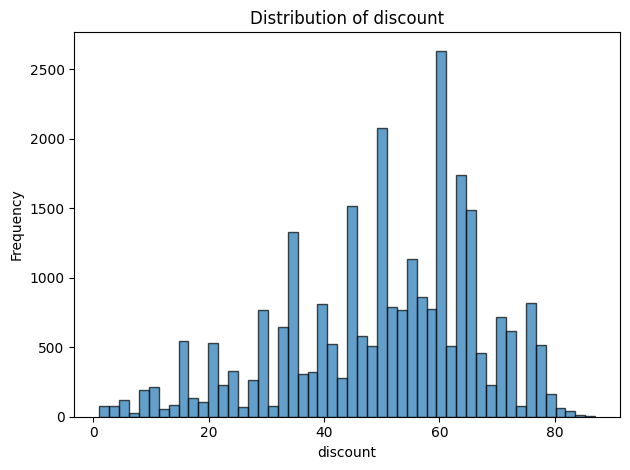

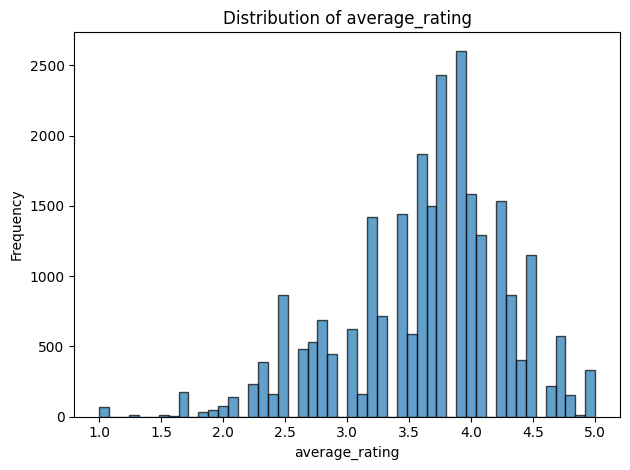

In [125]:
# Distributions of numerical fields
num_fields = ['selling_price', 'actual_price', 'discount', 'average_rating']

for col in num_fields:
    plt.figure()
    clean_data[col].dropna().plot(kind='hist', bins=50, edgecolor='black', alpha=0.7)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

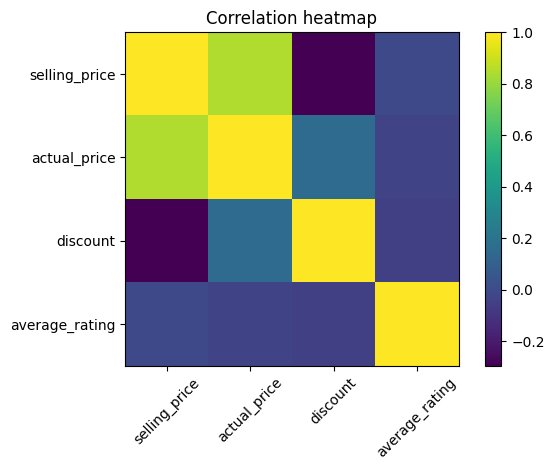

In [128]:
# Correlation heatmap
corr = clean_data[num_fields].corr()

plt.figure()
plt.imshow(corr, interpolation="nearest")
plt.xticks(range(len(num_fields)), num_fields, rotation=45)
plt.yticks(range(len(num_fields)), num_fields)
plt.title("Correlation heatmap")
plt.colorbar()
plt.tight_layout()
plt.show()


### ESTO NO ME VA, NO ME DA TIEMPO A MIRAR PORQUE

In [127]:
clean_data.groupby('brand').mean()

TypeError: agg function failed [how->mean,dtype->object]

In [ ]:
plt.figure(figsize=(15, 16))

plt.subplot(1, 2, 1)
tmp = clean_data.groupby('brand').mean().sort_values('out_of_stock', ascending=False).reset_index()
sns.barplot(data=tmp[:r], y='brand', x='out_of_stock')
plt.title('Top 25 most common "description" words')

plt.subplot(1, 2, 2)
tmp = pd.DataFrame(clean_data['title'].str.split().explode().value_counts().sort_values(ascending=False)).reset_index()
sns.barplot(data=tmp[:r], y='title', x='count')
plt.title('Top 25 most common "title" words')

plt.show()